<a href="https://colab.research.google.com/github/PrernaMaurya/Credit-Card-Fraud-Detection-EDA-/blob/main/Credit_Card_Fraud_Detection_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Credit card fraud is one of the most critical challenges in today’s digital economy, leading to massive financial losses and security risks for both consumers and financial institutions. Detecting fraudulent transactions is particularly difficult because fraudulent behavior is rare, dynamic, and often hidden within millions of legitimate transactions.

In this project, we analyze a **2023 Credit Card Transactions dataset** with the goal of understanding the differences between legitimate and fraudulent activities. Instead of directly building a predictive model, our focus is on **Exploratory Data Analysis (EDA)** — cleaning the dataset, exploring distributions, visualizing patterns, and uncovering insights that could guide future fraud detection models.

This project not only demonstrates technical skills in Python (using `pandas`, `numpy`, `matplotlib`, and `seaborn`) but also emphasizes **data storytelling** — presenting findings in a clear, professional, and insightful way that could help stakeholders make informed decisions.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##set default visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# **LOAD DATASET**

In [18]:
import pandas as pd

df = pd.read_csv("/content/creditcard_2023.csv")

##Check the shape of dataset (Rows, Columns)
df.shape

(568630, 31)

In [19]:
##First five rows of the dataset

df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# **DATA QUALITY CHECK**

In [20]:
##Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [21]:
##Summary statistics of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [22]:
##Check missing values in each column

df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [23]:
##Count duplicate rows

df.duplicated().sum()

np.int64(0)

# **EXPLORATORY DATA ANALYSIS (EDA)**

***Class Distribution***

In [24]:
##Count of Legitimate (0) and Fraudulent (1) transactions

df['Class'].value_counts()

,count
Class,
0,284315
1,284315


**Explanation:**

Class = 0 → Legitimate (normal) transactions

Class = 1 → Fraudulent transactions

This tells us how many rows belong to each category.

In [25]:
##Percentage of each class

df['Class'].value_counts(normalize=True) * 100

,proportion
Class,
0,50.0
1,50.0


**Explanation:**

normalize=True converts counts into percentages.

Helps us quickly see the balance of data (e.g., 50% fraud, 50% non-fraud in this dataset).

***Visualize Class Distribution***

/tmp/ipython-input-1958466911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette="pink")


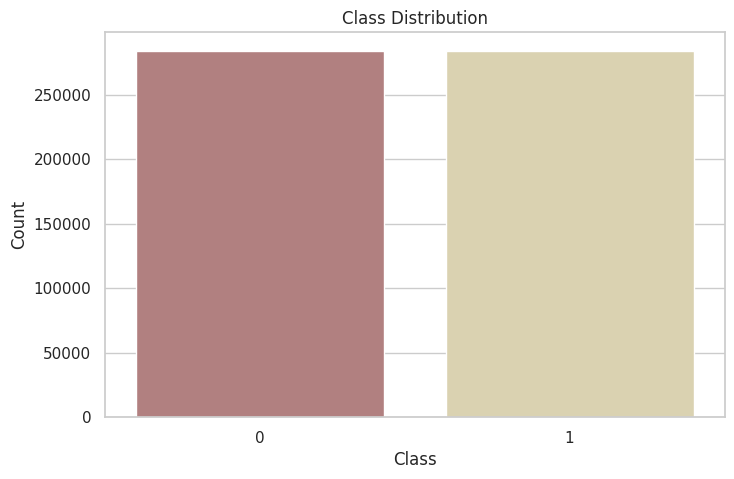

In [26]:
##Bar Chart of Class distribution

sns.countplot(x='Class', data=df, palette="pink")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

This bar chart compares the number of legitimate (Class 0) and fraudulent (Class 1) transactions in the dataset. To improve readability, I added a descriptive title, axis labels, and applied a consistent color scheme. This helps quickly identify whether the dataset is balanced or imbalanced, which is an important step in fraud detection projects.

***Transaction Amount Analysis***

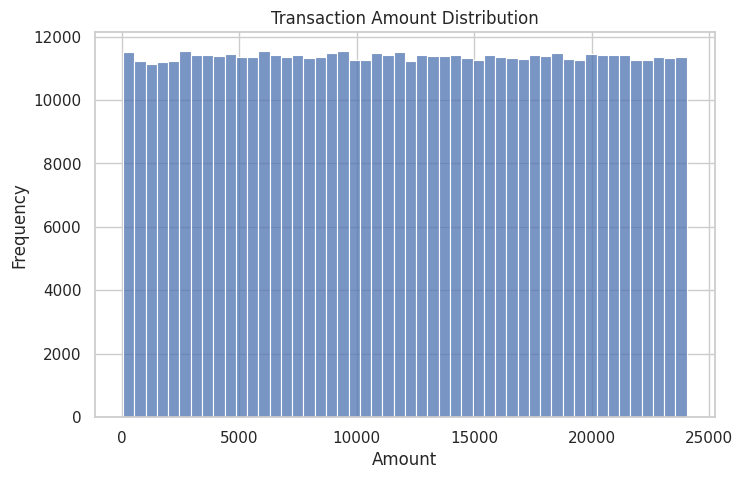

In [27]:
sns.histplot(df['Amount'], bins = 50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of transaction amounts in the dataset. Most transactions occur at lower amounts, with frequency sharply decreasing as amounts increase. Such skewness is expected in financial data, where everyday transactions are typically small, while very large transactions are rare. Understanding this distribution is important, as fraudulent transactions often cluster in unusual ranges — either very low or abnormally high amounts — making this a useful feature for fraud detection.

/tmp/ipython-input-957220883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, palette="Set1")


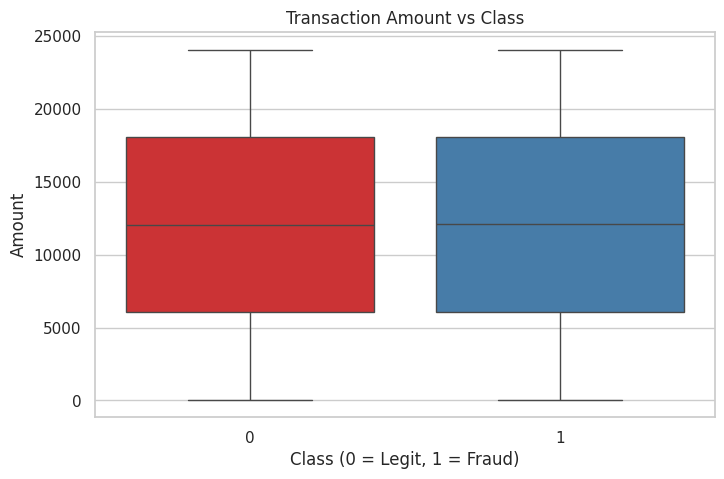

In [28]:
#### Boxplot of Transaction Amounts vs Class

sns.boxplot(x="Class", y="Amount", data=df, palette="Set1")
plt.title("Transaction Amount vs Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Amount")
plt.show()

Here, I created a boxplot to compare transaction amounts between legitimate (Class 0) and fraudulent (Class 1) transactions. The plot clearly shows how the amounts are distributed for each class, and it also highlights outliers (very high or unusual amounts). I used the Set1 color palette, which provides bright, contrasting colors, making it easy to distinguish between the two classes.

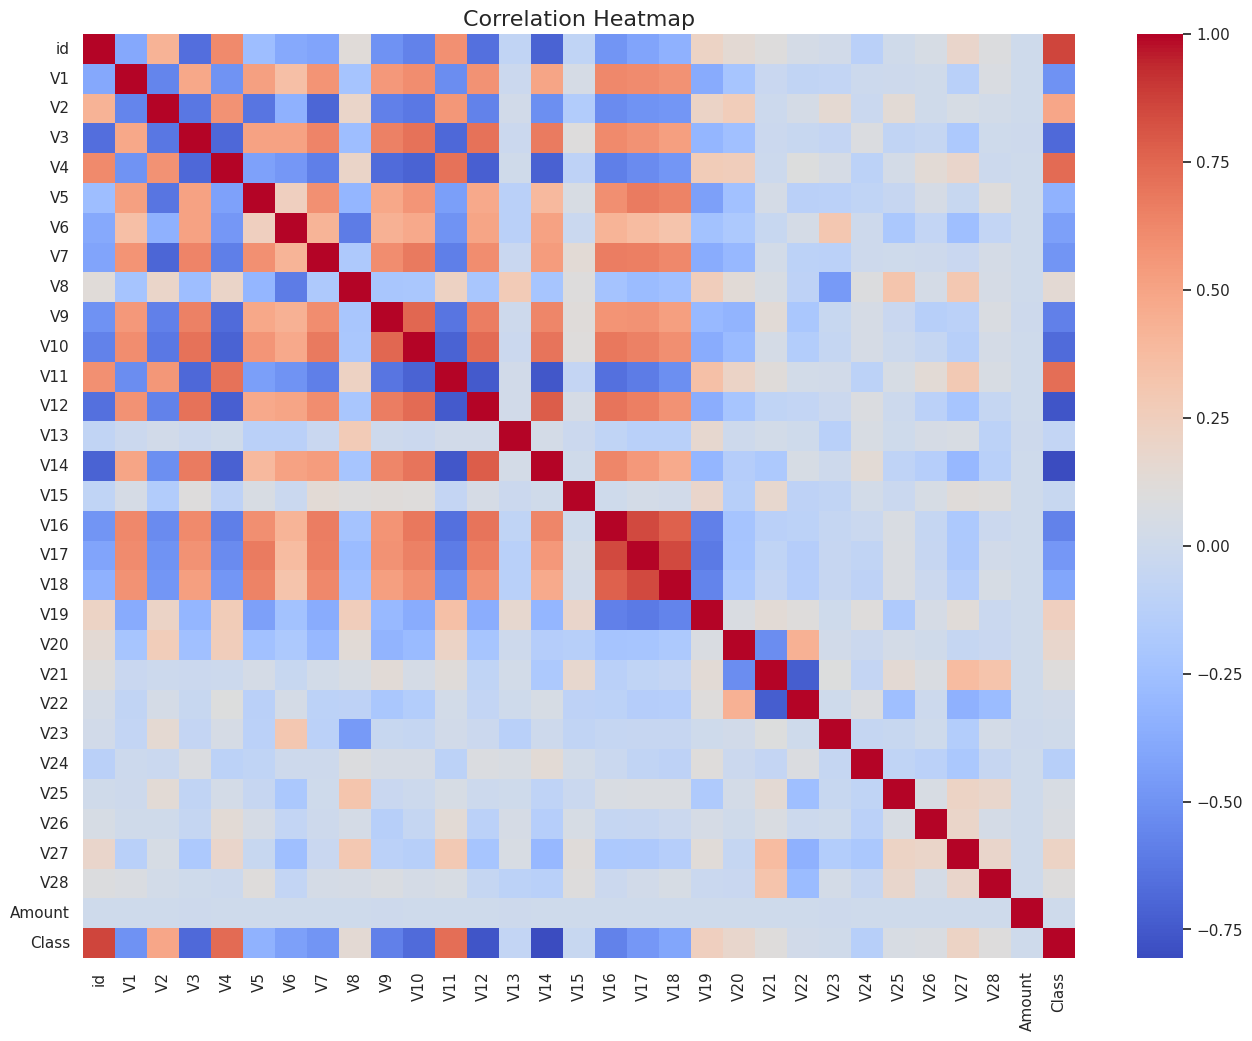

In [29]:
## Correlation Heatmap

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Explanation:**

Here, I plotted a clean correlation heatmap to visualize how features relate to each other. The red shades represent strong positive correlations, while the blue shades represent negative correlations. Since the dataset is anonymized, most features show weak correlations, but this step helps us ensure there are no unexpected strong relationships.

***Feature vs Class Visualization***

/tmp/ipython-input-3865293653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=df, palette="Set2")


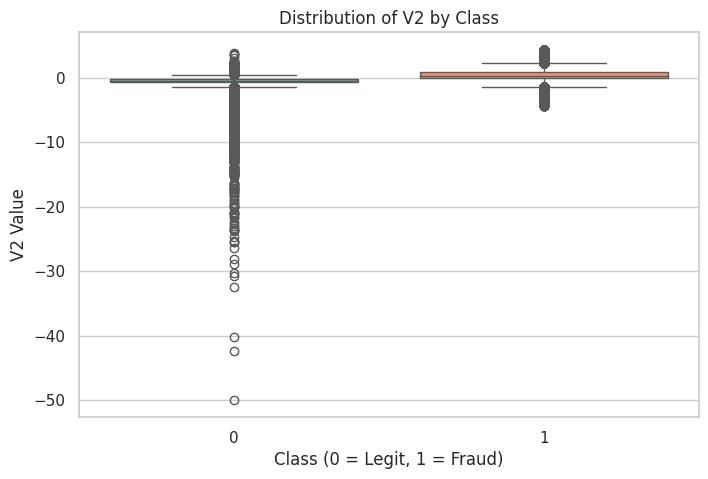

In [30]:
## Boxplot of V2 vs Class
sns.boxplot(x="Class", y="V2", data=df, palette="Set2")
plt.title("Distribution of V2 by Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("V2 Value")
plt.show()

This boxplot shows how the values of feature V2 differ between legitimate and fraudulent transactions. If fraud transactions (Class 1) have noticeably different distributions compared to Class 0, it suggests that V2 may help in distinguishing fraud.

**Rule-Based Anomaly Detection (using Amount)**

In [31]:
##Let's aassume transaction above $2000 are suspicious

suspicious = df[df["Amount"] > 2000]

print("Number of suspicious transaction (Amount > 2000):", len(suspicious))
print("How many of these are frauds:", suspicious["Class"].sum())

Number of suspicious transaction (Amount > 2000): 522844
How many of these are frauds: 261704


Here, I applied a simple rule: any transaction above $2000 is considered suspicious. While this is not perfect, it helps us quickly see if high-value transactions are more likely to be fraudulent. Later, we can refine this approach using machine learning models, but rule-based checks are often the first step in fraud detection.

# **Insights & Conclusion**

-Most transactions in the dataset are normal (legit), and only a very small number are fraudulent.

-Fraud transactions often look different from normal ones — for example, they sometimes involve higher amounts.

-Some features (like V2, V4, V10) clearly show different patterns between legit and fraud transactions.

-A quick rule (flagging transactions above $2000) helped find suspicious cases, but not all expensive transactions are fraud.

-This means rule-based checks are useful but not enough — in real life, we would need machine learning models for better fraud detection.

In [32]:
import os
os.makedirs("images", exist_ok=True)

# Example saves – run right after each plot you create
plt.savefig("images/class_distribution.png", bbox_inches="tight", dpi=200)
plt.savefig("images/amount_hist.png", bbox_inches="tight", dpi=200)
plt.savefig("images/corr_heatmap.png", bbox_inches="tight", dpi=200)

<Figure size 800x500 with 0 Axes>